In [66]:
# Load needed Modules
import pandas as pd

# Data Wrangling
- Data Assessing by printing the first five rows

In [67]:
# load the datset into DataFrmae 
df=pd.read_csv(r"E:\data\Superstore.csv", encoding='latin1')

In [68]:
# dissplay all data columns
pd.options.display.max_columns=None

In [69]:
# display first rws
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [70]:
# copy the dataframe
df_copy = df.copy()

In [71]:
# check for data size
df.shape

(9994, 21)

In [72]:
## check for data info (quality)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [73]:
# check for Duplicates 
df.duplicated().sum()

np.int64(0)

In [74]:
# Clean column names: remove extra spaces, convert to lowercase, and replace spaces with underscores for consistency
df.columns= df.columns.str.strip().str.lower().str.replace(' ','_')
#check
print(df.columns)

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')


In [75]:
# drop uneeded columns
df.drop(columns=['row_id','order_id','customer_id','product_id','postal_code','region','product_name'], inplace=True)

In [76]:
# check drop uneeded columns
df.head(2)

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,category,sub-category,sales,quantity,discount,profit
0,09-11-2013,12-11-2013,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Bookcases,261.96,2,0.0,41.9136
1,09-11-2013,12-11-2013,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Chairs,731.94,3,0.0,219.5820


In [77]:
# Date Column Type Conversion
df['order_date']=pd.to_datetime(df['order_date'],format='%d-%m-%Y')
df['ship_date']=pd.to_datetime(df['ship_date'],format='%d-%m-%Y')
# check
print(df['order_date'].dtypes,df['ship_date'].dtypes)

datetime64[ns] datetime64[ns]


- # Column Preparation & Analysis

In [78]:
# Top 10 customers by quantity sold
top10_customers=df.groupby('customer_name',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False).head(10)
# check
top10_customers

,customer_name,quantity
391,Jonathan Doherty,150
787,William Brown,146
387,John Lee,143
595,Paul Prost,138
713,Steven Cartwright,133
259,Emily Phan,124
145,Chloris Kastensmidt,122
133,Cassandra Brandow,122
249,Edward Hooks,120
502,Matt Abelman,117


In [79]:
# Top 10 customers by profit sold
top10_customers_profit=df.groupby('customer_name')['profit'].sum().sort_values(ascending=False).head(10)
top10_customers_profit=top10_customers_profit.reset_index()
# check
top10_customers_profit

,customer_name,profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119
3,Hunter Lopez,5622.4292
4,Adrian Barton,5444.8055
5,Tom Ashbrook,4703.7883
6,Christopher Martinez,3899.8904
7,Keith Dawkins,3038.6254
8,Andy Reiter,2884.6208
9,Daniel Raglin,2869.0760


In [80]:
# Top 3 customer segments by quantity sold
top3_segment=df.groupby('segment',as_index=False)['quantity'].sum().sort_values('quantity',ascending=False).head(3)
# check
top3_segment

,segment,quantity
0,Consumer,19521
1,Corporate,11608
2,Home Office,6744


In [81]:
# How many times each shipping company has been used
shipping_usage_counts=df['ship_mode'].value_counts().reset_index()
#check
shipping_usage_counts

,ship_mode,count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [82]:
# Top 2 Most Used Shipping Methods
most_used_shipping=df['ship_mode'].value_counts().reset_index().head(2)
# check
most_used_shipping

,ship_mode,count
0,Standard Class,5968
1,Second Class,1945


In [83]:
# Total State Sales
total_state_sales=df.groupby('country')['profit'].sum().reset_index()
# check
total_state_sales

,country,profit
0,United States,286397.0217


In [84]:
# Total sales of each governorate
total_governorate_sales=df.groupby('state')['profit'].sum().reset_index()
# check
total_governorate_sales

,state,profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76381.3871
4,Colorado,-6527.8579
5,Connecticut,3511.4918
6,Delaware,9977.3748
7,District of Columbia,1059.5893
8,Florida,-3399.3017
9,Georgia,16250.0433


In [85]:
 # Top 10  Governorates of Total Sales
top10_governorates_sales = df.groupby('state')['profit'].sum().sort_values(ascending=False).head(10)
top10_governorates_sales=top10_governorates_sales.reset_index()
# check 
top10_governorates_sales

,state,profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


In [86]:
# Governorates with losses
loss_governorates=total_governorate_sales[total_governorate_sales['profit'] <=0].sort_values('profit',ascending=True)
loss_governorates=loss_governorates.reset_index(drop=True)
# check
loss_governorates

,state,profit
0,Texas,-25729.3563
1,Ohio,-16971.3766
2,Pennsylvania,-15559.9603
3,Illinois,-12607.8870
4,North Carolina,-7490.9122
5,Colorado,-6527.8579
6,Tennessee,-5341.6936
7,Arizona,-3427.9246
8,Florida,-3399.3017
9,Oregon,-1190.4705


In [87]:
# The 4 governorates with the most losses
Top4_loss_governorates=loss_governorates.head(4)
# check
Top4_loss_governorates

,state,profit
0,Texas,-25729.3563
1,Ohio,-16971.3766
2,Pennsylvania,-15559.9603
3,Illinois,-12607.8870


In [88]:
# Total sales of each city
total_city_sales=df.groupby('city')['profit'].sum().reset_index()
# check
total_city_sales

,city,profit
0,Aberdeen,6.6300
1,Abilene,-3.7584
2,Akron,-186.6356
3,Albuquerque,634.0881
4,Alexandria,318.6183
...,...,...
526,Woonsocket,78.6791
527,Yonkers,2767.7557
528,York,-102.1692
529,Yucaipa,13.2080


In [89]:
# Top 10  city of Total Sales
top10_city_sales = df.groupby('city')['profit'].sum().reset_index().sort_values('profit',ascending=False).head(10)
# check 
top10_city_sales

,city,profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


In [90]:
# city with losses
loss_city=total_city_sales[total_city_sales['profit'] <=0].sort_values('profit',ascending=True)
loss_city=loss_city.reset_index(drop=True)
# check
loss_city

,city,profit
0,Philadelphia,-13837.7674
1,Houston,-10153.5485
2,San Antonio,-7299.0502
3,Lancaster,-7239.0684
4,Chicago,-6654.5688
...,...,...
111,Ormond Beach,-1.9656
112,Pensacola,-1.4760
113,Elyria,-1.3984
114,Altoona,-1.1835


In [91]:
# The 5 city with the most losses
top5_loss_city=loss_city.head(4)
# check
top5_loss_city

,city,profit
0,Philadelphia,-13837.7674
1,Houston,-10153.5485
2,San Antonio,-7299.0502
3,Lancaster,-7239.0684


In [92]:
# Total Lots Sold for Each Category
total_lots_per_category = df.groupby('category')['quantity'].sum().reset_index().sort_values('quantity',ascending=False)
# check 
total_lots_per_category

,category,quantity
1,Office Supplies,22906
0,Furniture,8028
2,Technology,6939


In [93]:
# Gross profit per category
gross_profit_per_category = df.groupby('category')['profit'].sum().reset_index().sort_values('profit',ascending=False)
# check 
gross_profit_per_category

,category,profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


In [94]:
# Total Lots Sold for Each sub-category
total_lots_per_sub_category = df.groupby('sub-category')['quantity'].sum().reset_index().sort_values('quantity',ascending=False)
# check 
total_lots_per_sub_category

,sub-category,quantity
3,Binders,5974
12,Paper,5178
9,Furnishings,3563
13,Phones,3289
14,Storage,3158
2,Art,3000
0,Accessories,2976
5,Chairs,2356
1,Appliances,1729
10,Labels,1400


In [95]:
# Gross profit per 	sub-category
gross_profit_per_subcategory = df.groupby('sub-category')['profit'].sum().reset_index().sort_values('profit',ascending=False)
# check 
gross_profit_per_subcategory

,sub-category,profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


In [96]:
# loss sub-category total
loss_subcategory =gross_profit_per_subcategory[gross_profit_per_subcategory['profit']<=0].sort_values('profit',ascending=True)
# check
loss_subcategory

,sub-category,profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995


In [97]:
# Display the top 7 sub-categories based on total gross profit
top7_sub_gp=gross_profit_per_subcategory.reset_index(drop=True).head(7)
# check
top7_sub_gp

,sub-category,profit
0,Copiers,55617.8249
1,Phones,44515.7306
2,Accessories,41936.6357
3,Paper,34053.5693
4,Binders,30221.7633
5,Chairs,26590.1663
6,Storage,21278.8264


In [98]:
# Extract Month from Date
df['month']=df['order_date'].dt.month
# check 
df.head(2)

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,category,sub-category,sales,quantity,discount,profit,month
0,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Bookcases,261.96,2,0.0,41.9136,11
1,2013-11-09,2013-11-12,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,Furniture,Chairs,731.94,3,0.0,219.5820,11


In [99]:
# Total sales per month
total_month=df.groupby('month',as_index=False)['profit'].sum().sort_values('profit',ascending=True)
total_month=total_month.reset_index(drop=True)
#check
total_month

,month,profit
0,1,9199.2700
1,2,10288.8987
2,4,13437.8068
3,7,13535.3830
4,6,20899.3345
5,8,21896.7154
6,5,22308.5128
7,3,26806.5737
8,10,31469.6638
9,11,35825.5366


In [100]:
#  top  4 month profit
top4_profit_month=total_month.head(4)
# check 
top4_profit_month

,month,profit
0,1,9199.2700
1,2,10288.8987
2,4,13437.8068
3,7,13535.3830


In [101]:
# Total Pieces Sold in a Month
total_pieces_month= df.groupby('month',as_index=False)['quantity'].sum().sort_values('month')
total_pieces_month=total_pieces_month.reset_index(drop=True)
# check
total_pieces_month

,month,quantity
0,1,1500
1,2,1068
2,3,2491
3,4,2441
4,5,2850
5,6,2644
6,7,2705
7,8,2796
8,9,5073
9,10,3095


In [102]:
#  top  4 month quantity
top4_profit_quantity=total_pieces_month.head(4)
# check 
top4_profit_quantity

,month,quantity
0,1,1500
1,2,1068
2,3,2491
3,4,2441


In [103]:
#  The most day that the products are shipped
shipped_date=df['ship_date'].value_counts()
shipped_date=shipped_date.reset_index().head(5)
# check
shipped_date

,ship_date,count
0,2012-12-16,35
1,2014-09-27,34
2,2014-11-22,32
3,2014-12-07,32
4,2014-09-07,30


In [104]:
# Add a column that recognizes how long it takes to ship from the day of order to the day of shipment
df['shipping_days'] =df['ship_date'] - df['order_date']
# check 
df.sample(3)

,order_date,ship_date,ship_mode,customer_name,segment,country,city,state,category,sub-category,sales,quantity,discount,profit,month,shipping_days
4843,2013-11-08,2013-11-10,First Class,Cindy Chapman,Consumer,United States,Lakewood,New Jersey,Office Supplies,Fasteners,14.96,4,0.0,0.2992,11,2 days
5241,2013-09-24,2013-09-27,Second Class,Candace McMahon,Corporate,United States,Seattle,Washington,Office Supplies,Supplies,13.68,2,0.0,3.6936,9,3 days
5631,2011-02-12,2011-02-16,Standard Class,Natalie Fritzler,Consumer,United States,Chesapeake,Virginia,Furniture,Tables,1256.22,6,0.0,75.3732,2,4 days


In [105]:
# mean shipping days
mean_shipping_days=df['shipping_days'].mean()
#check
mean_shipping_days

Timedelta('3 days 23:00:46.828096858')

- # Data Visualization

In [106]:
# Load needed Modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [107]:
# color 
colors = [
    "#FFC0CB",  # Pink
    "#FFB6C1",  # Light Pink
    "#FF99CC",  # Soft Pink
    "#FF77BB",  # Rose Pink
    "#DD55CC",  # Orchid
    "#BB33CC",  # Medium Purple
    "#9933CC",  # Purple
    "#8800AA",  # Deep Purple
    "#770099",  # Dark Violet
    "#660077",  # Rich Violet
]

- # Top 10 Customers by Units Sold

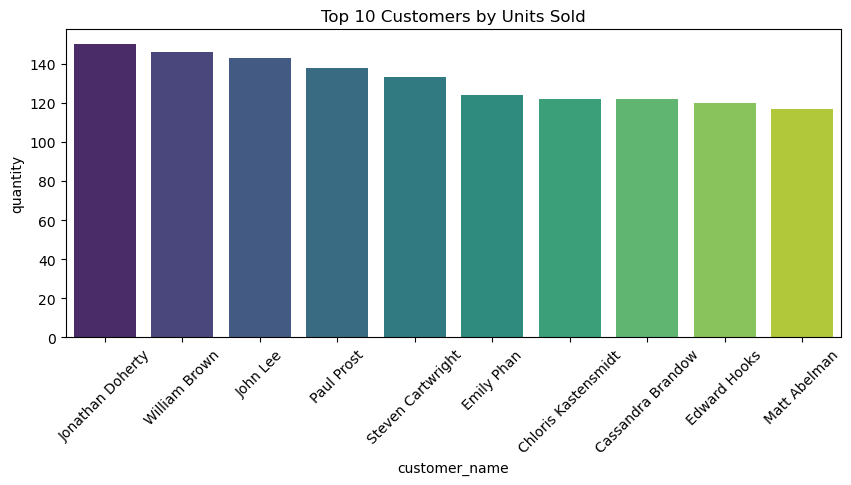

In [112]:
plt.figure(figsize=(10,4))
sns.barplot(data=top10_customers,x='customer_name',y='quantity', hue='customer_name',palette="viridis")
plt.title('Top 10 Customers by Units Sold')
plt.xticks(rotation=45)
plt.show()

- # Top 10 Profitable Clients

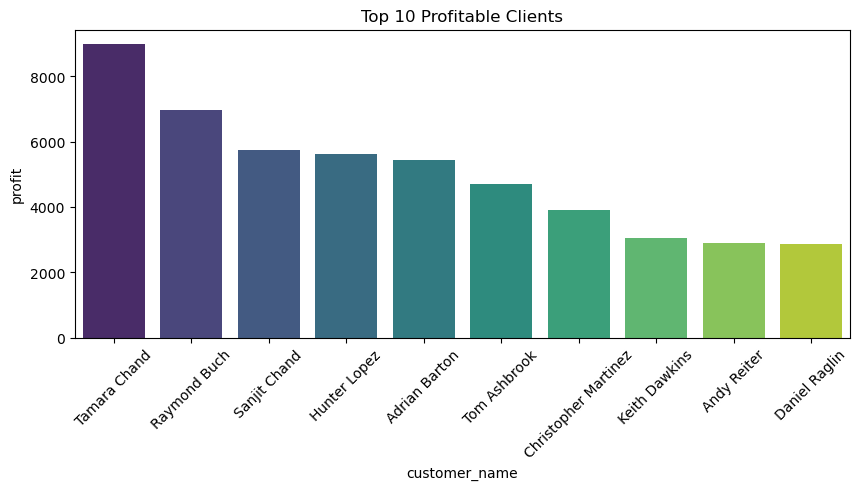

In [117]:
plt.figure(figsize=(10,4))
sns.barplot(data=top10_customers_profit,x='customer_name',y='profit', hue='customer_name',palette="viridis")
plt.title('Top 10 Profitable Clients')
plt.xticks(rotation=45)
plt.show()

- # Top 3 Customer Segments by Quantity

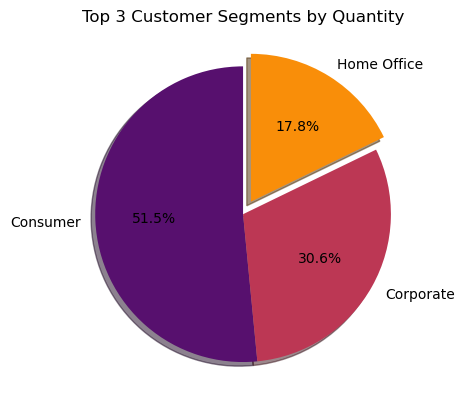

In [52]:
size = top3_segment['quantity'].abs()
labels = top3_segment['segment']
colorr=sns.color_palette("inferno",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0.1],shadow=True)
plt.title("Top 3 Customer Segments by Quantity")
plt.show()


- # Top  Shipping Methods

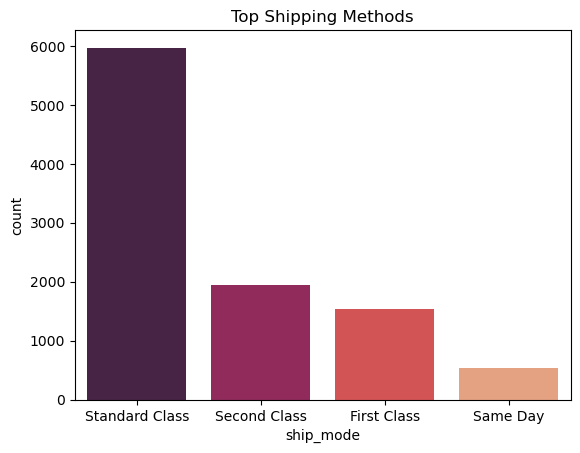

In [124]:
sns.barplot(data=shipping_usage_counts,x='ship_mode',y='count',hue='ship_mode',palette='rocket')
plt.title('Top Shipping Methods')
plt.show()

- # Top 10  Governorates of Total Sales

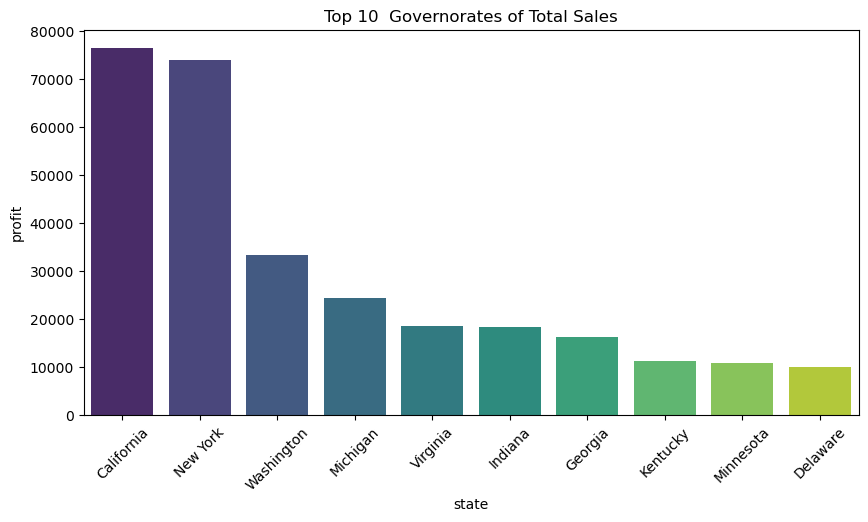

In [298]:
plt.figure(figsize=(10,5))
sns.barplot(data=top10_governorates_sales ,x ='state',y = 'profit',hue='state',palette='viridis')
plt.title('Top 10  Governorates of Total Sales')
plt.xticks(rotation=45)
plt.show()

- # The most 4 governorates with a loss rate

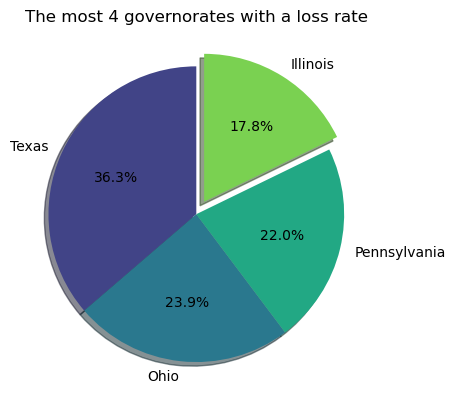

In [341]:
size = Top4_loss_governorates['profit'].abs()
labels = Top4_loss_governorates['state']
colorr=sns.color_palette("viridis",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0,0.1],shadow=True)
plt.title("The most 4 governorates with a loss rate")
plt.show()


- # Top 10  city of Total Sales

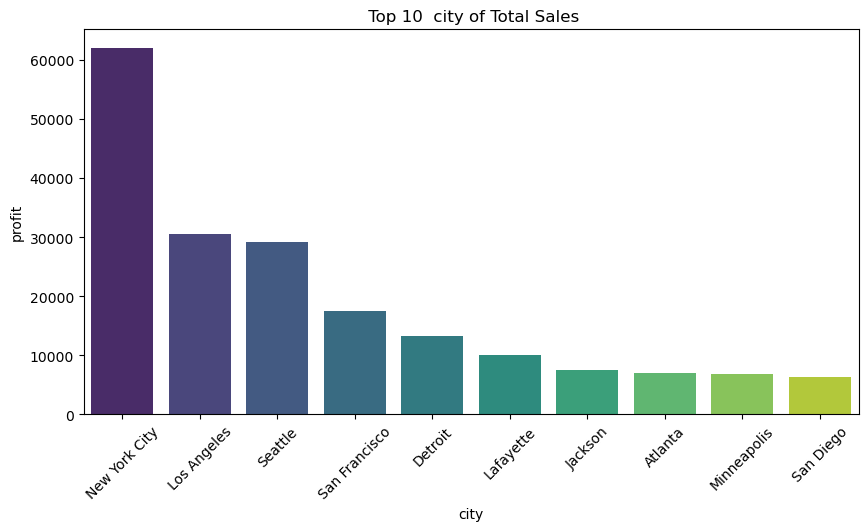

In [345]:
plt.figure(figsize=(10,5))
sns.barplot(data=top10_city_sales  ,x ='city',y = 'profit',hue='city',palette='viridis')
plt.title(' Top 10  city of Total Sales')
plt.xticks(rotation=45)
plt.show()

- # The most 4 city with a loss rate

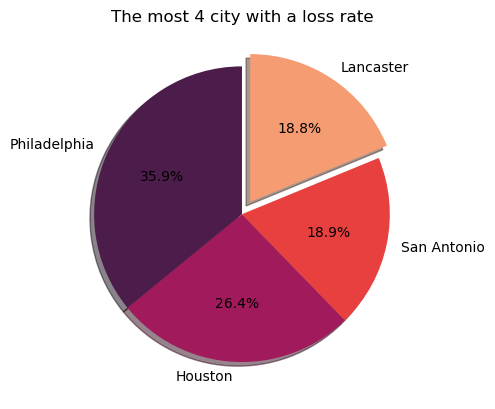

In [122]:
size = top5_loss_city['profit'].abs()
labels = top5_loss_city['city']
colorr=sns.color_palette("rocket",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0,0.1],shadow=True)
plt.title("The most 4 city with a loss rate")
plt.show()


- # Profit percentage of the main category of the product


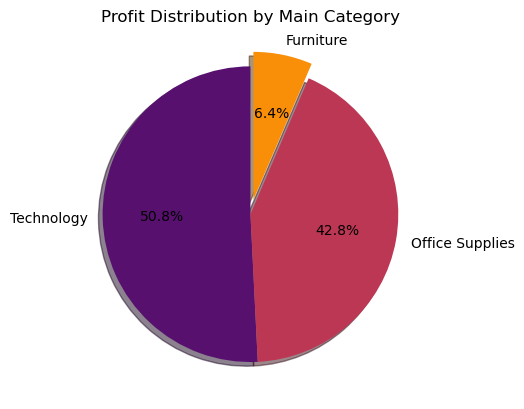

In [46]:
size = gross_profit_per_category ['profit'].abs()
labels = gross_profit_per_category ['category']
colorr=sns.color_palette("inferno",len(labels))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90,colors=colorr,explode=[0,0,0.1],shadow=True)
plt.title("Profit Distribution by Main Category")
plt.show()

- # Display the top 7 sub-categories based on total gross profit

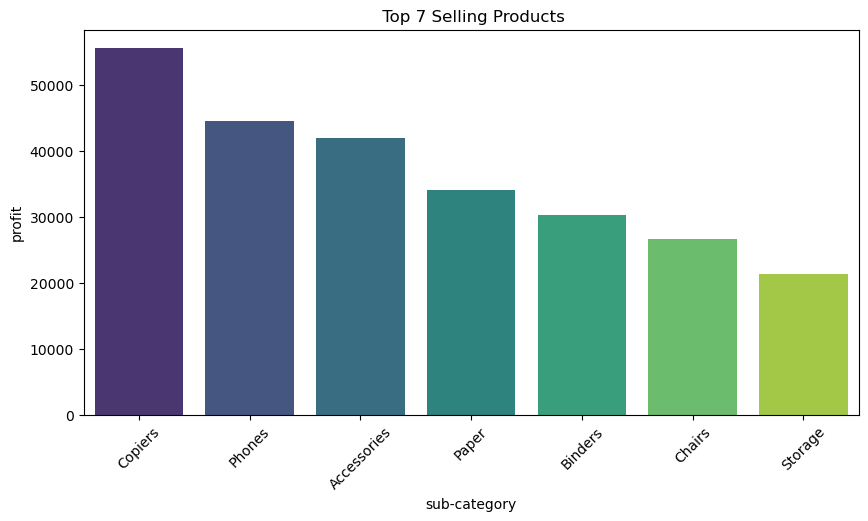

In [398]:
plt.figure(figsize=(10,5))
sns.barplot(data=top7_sub_gp  ,x ='sub-category',y = 'profit',palette='viridis',hue='sub-category')
plt.title(' Top 7 Selling Products')
plt.xticks(rotation=45)
plt.show()

- # Total sales each month and mean sales month

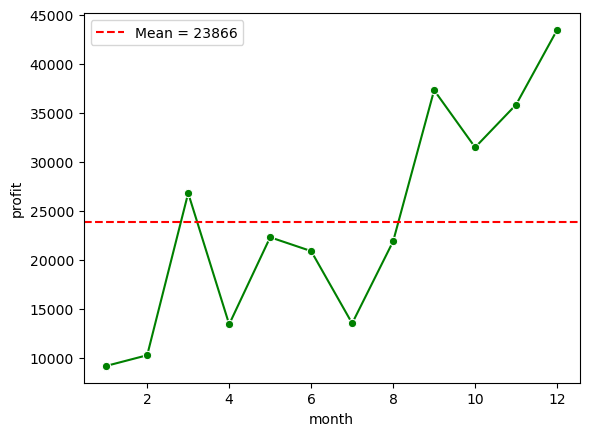

In [380]:
sns.lineplot(data=total_month, x = 'month' , y = 'profit',marker='o' ,color='green')
mean_sales=total_month['profit'].mean()
plt.axhline(mean_sales, color='red', linestyle='--', label=f'Mean = {mean_sales:.0f}')
plt.legend()
plt.show()

- # Conclusion

- ### sales of the month :
- The average monthly sales are 23,866
- indicating the typical monthly performance
- The month with the highest sales was December, reaching 43,436.13
- followed by September with 37,293.19
- November with 35,825.54, and October with 31,469.66
- All months exceeded the average, showing a consistently strong sales performance throughout the period

- ### Sales of sub-products
- The company's highest profits came from copiers, telephones, accessories, paper, and folders
- while tables, bookcases, and supplies caused losses
- Focusing on best-selling products maintains profitability
- while losing products need to reduce costs or adjust your sales strategy

- ### Average Shipping Time: 
- Shipping time for all orders is approximately 4 days

- ### Main Categories
- The highest profits come from the Technology category (145,454.95), followed by Office Supplies (122,490.80)
- while Furniture generates the lowest profit (18,451.27)
- This indicates that focusing on Technology and Office Supplies can maximize profitability
- whereas Furniture may need cost management or sales strategy adjustments

- ### Governorates & Cities Sales
- The company achieves the highest profits from California and New York
- with New York City being the top-performing city. On the other hand
- Texas and Ohio are the states with the largest losses
- while Philadelphia and Houston are the main loss-making cities
- This indicates that focusing efforts on high-performing regions and reviewing strategies in loss-making areas could improve overall profitability

- ### Shipping Methods 
- Most shipments were made using Standard Class (5,968)
- followed by Second Class (1,945).

- ### Client Type/Category
- The Consumer segment sold the highest number of products
- followed by Corporate and Home Office
- showing that most sales came from individual consumers

- ### Best Selling Pieces Customer Names
- Jonathan Doherty is the top customer with the highest number of products purchased
- followed by William Brown, John Lee, Paul Prost, and Steven Cartwright.